In [1]:
# Importing the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Imputing the missing data using basic python

In [2]:
# Read the data
dataset = pd.read_excel("\\Users\\Parul\\Desktop\\DATASETS\\stark_data.xlsx")

In [3]:
dataset

,Character,Age,Gender,Survived
0,Eddard,52.0,Male,0
1,John,27.0,Male,1
2,Arya,21.0,Female,1
3,Bran,19.0,Male,1
4,Robb,NaN,Male,0
5,Sansa,24.0,Female,1


In [4]:
dataset.shape

(6, 4)

In [5]:
#Information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
Character    6 non-null object
Age          5 non-null float64
Gender       6 non-null object
Survived     6 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 272.0+ bytes


In [6]:
# Check for null value
dataset.isnull()

,Character,Age,Gender,Survived
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,True,False,False
5,False,False,False,False


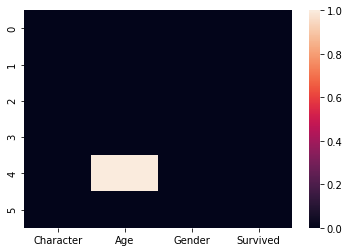

In [7]:
sb.heatmap(dataset.isnull())

In [8]:
#POpulating values in independent and dependent var
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,3]
x

,Character,Age,Gender
0,Eddard,52.0,Male
1,John,27.0,Male
2,Arya,21.0,Female
3,Bran,19.0,Male
4,Robb,NaN,Male
5,Sansa,24.0,Female


In [9]:
# using of centre 
x['Age']

0    52.0
1    27.0
2    21.0
3    19.0
4     NaN
5    24.0
Name: Age, dtype: float64

In [10]:
x['Age'].mean()

28.6

In [11]:
def impute_age(Age):
    if pd.isnull(Age):
            return 28.6
    else:
        return Age

In [12]:
x['Age'] = x[ 'Age'].apply(impute_age)

In [13]:
x

,Character,Age,Gender
0,Eddard,52.0,Male
1,John,27.0,Male
2,Arya,21.0,Female
3,Bran,19.0,Male
4,Robb,28.6,Male
5,Sansa,24.0,Female


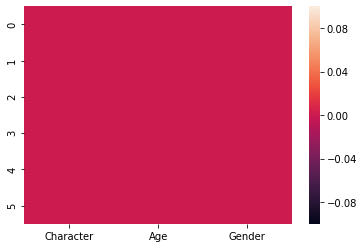

In [14]:
sb.heatmap(x.isnull())

 # Imputing Missing Value using Machine Learning

In [15]:
# Importing the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [16]:
# Read the data
dataset = pd.read_excel("\\Users\\Parul\\Desktop\\DATASETS\\stark_data.xlsx")

In [17]:
dataset

,Character,Age,Gender,Survived
0,Eddard,52.0,Male,0
1,John,27.0,Male,1
2,Arya,21.0,Female,1
3,Bran,19.0,Male,1
4,Robb,NaN,Male,0
5,Sansa,24.0,Female,1


In [18]:
dataset.head()

,Character,Age,Gender,Survived
0,Eddard,52.0,Male,0
1,John,27.0,Male,1
2,Arya,21.0,Female,1
3,Bran,19.0,Male,1
4,Robb,NaN,Male,0


In [19]:
dataset.shape

(6, 4)

In [20]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,3].values
x[:,1:2]

array([[52.0],
       [27.0],
       [21.0],
       [19.0],
       [nan],
       [24.0]], dtype=object)

## USing Machine Learning

In [21]:
#Impute missing value using sklearn imputer from preprocessing
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer.fit(x[:, 1:2])
x[:, 1:2] = imputer.transform(x[:, 1:2])
x[:, 1:2]

C:\Users\Parul\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[52.0],
       [27.0],
       [21.0],
       [19.0],
       [28.6],
       [24.0]], dtype=object)

In [22]:
help(Imputer)

Help on class Imputer in module sklearn.preprocessing.imputation:

class Imputer(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Imputer(*args, **kwargs)
 |  
 |  Imputation transformer for completing missing values.
 |  
 |  Read more in the :ref:`User Guide <imputation>`.
 |  
 |  Parameters
 |  ----------
 |  missing_values : integer or "NaN", optional (default="NaN")
 |      The placeholder for the missing values. All occurrences of
 |      `missing_values` will be imputed. For missing values encoded as np.nan,
 |      use the string value "NaN".
 |  
 |  strategy : string, optional (default="mean")
 |      The imputation strategy.
 |  
 |      - If "mean", then replace missing values using the mean along
 |        the axis.
 |      - If "median", then replace missing values using the median along
 |        the axis.
 |      - If "most_frequent", then replace missing using the most frequent
 |        value along the axis.
 |  
 |  axis : integer, optional (default=0)